## Clustered Bar Charts

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ = pd.read_csv('data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


![](images/clusteredBarChart1.png)

![](images/clusteredBarChart2.png)

In [36]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [48]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

In [49]:
ct_counts = ct_counts.reset_index(name = 'count')

In [50]:
ct_counts = ct_counts.pivot(index = 'trans_type', columns = 'VClass', values = 'count')

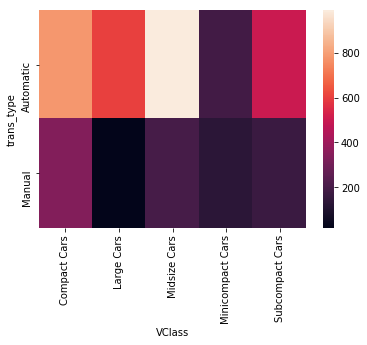

In [51]:
sb.heatmap(ct_counts)

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. 

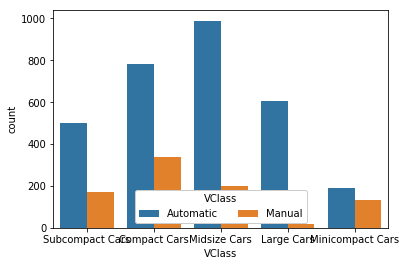

In [45]:
ax = sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'VClass')

### Alternative Approach (Heat Map)
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-d version of a histogram; here, we're using them as the 2-d version of a bar chart. 

In [53]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'trans_type', columns = 'VClass', values = 'count')

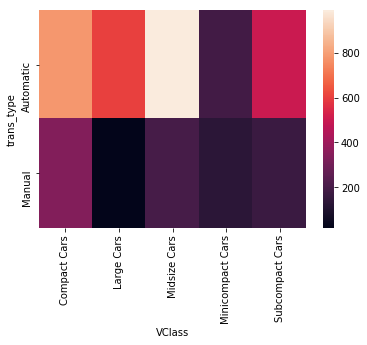

In [47]:
sb.heatmap(ct_counts)

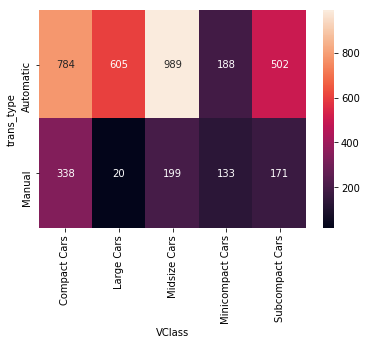

In [52]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')

```annot = True``` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding ```fmt = 'd'``` means that annotations will all be formatted as integers instead. You can use ```fmt = '.0f'``` if you have any cells with no counts, in order to account for NaNs.